# Problem: Is there home court advantage? And if there is, how effective is it? 
#                  This will be used as a basis for the prediction of the winning rate of                    teams in general.

## Instead of solely focusing on the number of wins or losses suffered by home teams to determine whether there exists home court advantage, we can also take a look at the margin between the points of both home and away teams, to determine how effective home court advantage is. In other words, by how much are the home teams winning against the away teams.

### Importing the essential Python Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [87]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [88]:
game_data = pd.read_csv('games_updated.csv')
game_data

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,12/3/2022,22101005,Final,Miami Heat,Minnesota Timberwolves,2021,Miami Heat,104.0,0.398,0.760,...,23.0,53.0,Minnesota Timberwolves,113.0,0.422,0.875,0.357,21.0,46.0,0
1,12/3/2022,22101006,Final,Chicago Bulls,Cleveland Cavaliers,2021,Chicago Bulls,101.0,0.443,0.933,...,20.0,46.0,Cleveland Cavaliers,91.0,0.419,0.824,0.208,19.0,40.0,1
2,12/3/2022,22101007,Final,San Antonio Spurs,Indiana Pacers,2021,San Antonio Spurs,108.0,0.412,0.813,...,28.0,52.0,Indiana Pacers,119.0,0.489,1.000,0.389,23.0,47.0,0
3,12/3/2022,22101008,Final,Golden State Warriors,Milwaukee Bucks,2021,Golden State Warriors,122.0,0.484,0.933,...,33.0,55.0,Milwaukee Bucks,109.0,0.413,0.696,0.386,27.0,39.0,1
4,12/3/2022,22101009,Final,Denver Nuggets,Toronto Raptors,2021,Denver Nuggets,115.0,0.551,0.750,...,32.0,39.0,Toronto Raptors,127.0,0.471,0.760,0.387,28.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,6/10/2014,11400007,Final,Atlanta Hawks,New Orleans Pelicans,2014,Atlanta Hawks,93.0,0.419,0.821,...,24.0,50.0,New Orleans Pelicans,87.0,0.366,0.643,0.375,17.0,43.0,1
25792,6/10/2014,11400004,Final,Chicago Bulls,Washington Wizards,2014,Chicago Bulls,81.0,0.338,0.719,...,18.0,40.0,Washington Wizards,85.0,0.411,0.636,0.267,17.0,47.0,0
25793,6/10/2014,11400005,Final,Los Angeles Lakers,Denver Nuggets,2014,Los Angeles Lakers,98.0,0.448,0.682,...,29.0,45.0,Denver Nuggets,95.0,0.387,0.659,0.500,19.0,43.0,1
25794,5/10/2014,11400002,Final,Toronto Raptors,Sacramento Kings,2014,Toronto Raptors,99.0,0.440,0.771,...,21.0,30.0,Sacramento Kings,94.0,0.469,0.725,0.385,18.0,45.0,1


In [89]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25796 non-null  object 
 1   GAME_ID           25796 non-null  int64  
 2   GAME_STATUS_TEXT  25796 non-null  object 
 3   HOME_TEAM_ID      25796 non-null  object 
 4   VISITOR_TEAM_ID   25796 non-null  object 
 5   SEASON            25796 non-null  int64  
 6   TEAM_ID_home      25796 non-null  object 
 7   PTS_home          25697 non-null  float64
 8   FG_PCT_home       25697 non-null  float64
 9   FT_PCT_home       25697 non-null  float64
 10  FG3_PCT_home      25697 non-null  float64
 11  AST_home          25697 non-null  float64
 12  REB_home          25697 non-null  float64
 13  TEAM_ID_away      25796 non-null  object 
 14  PTS_away          25697 non-null  float64
 15  FG_PCT_away       25697 non-null  float64
 16  FT_PCT_away       25697 non-null  float6

Let's list down all our observations from the super-quick glance of the dataset, as above.
* There are `21` variables/features/columns and `25796` observations/samples/rows in the dataset.         
* There are `3` variables identified as `int64` by default, and it seems they are indeed Numeric.     
* There are `6` variables identified as `object` by default, and they are most likely Categorical.
* The rest of the `12` variables are identified to be `float64` by default, and are most likely numeric as well.
* There might be variables/features with missing values (hence need to check again and refine accordingly).

## We could perhaps look at the points scored by the away and home teams to see if there is any relationship between them

In [90]:
p_away = pd.DataFrame(game_data[['PTS_away']])
p_home = pd.DataFrame(game_data[['PTS_home']])

In [91]:
p_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PTS_home  25697 non-null  float64
dtypes: float64(1)
memory usage: 201.7 KB


In [92]:
p_away.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PTS_away  25697 non-null  float64
dtypes: float64(1)
memory usage: 201.7 KB


<AxesSubplot:xlabel='PTS_away', ylabel='PTS_home'>

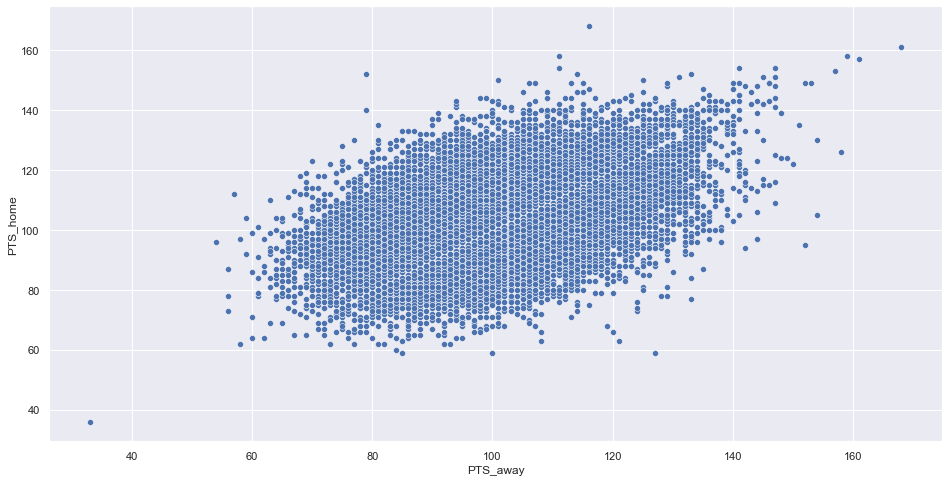

In [93]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=game_data, x="PTS_away", y="PTS_home")

## The scatterplot above shows that there is barely any correlation between the points scored by the away team(PTS_away) and home team (PTS_home) due to the obvious oval shape, although there is roughly a relationship which shows that as PTS_away increases, PTS_home increases as well. Hence this is not a good/effective indicator of whether home or away has the advantage.

<AxesSubplot:>

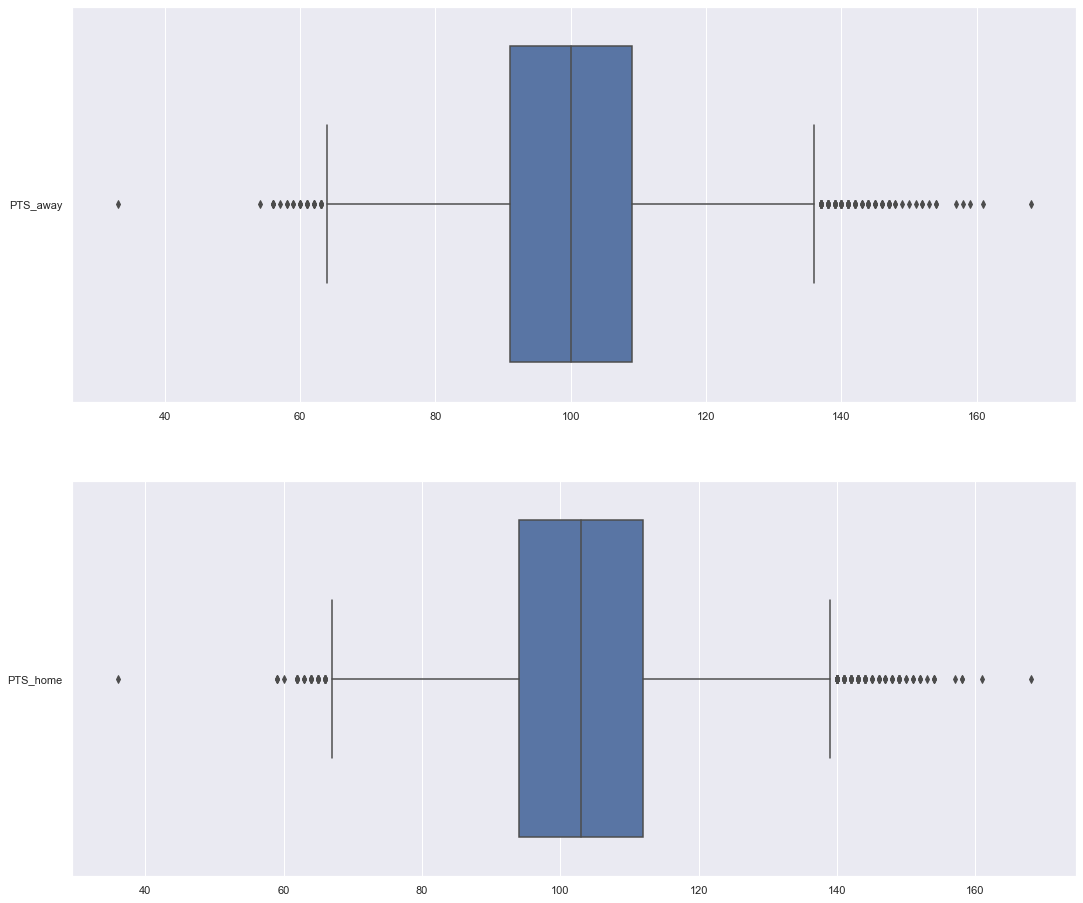

In [94]:
f, axes = plt.subplots(2, 1, figsize=(18, 16))
sb.boxplot(data = p_away, orient = "h", ax = axes[0])
sb.boxplot(data = p_home, orient = "h", ax = axes[1])

<AxesSubplot:ylabel='Count'>

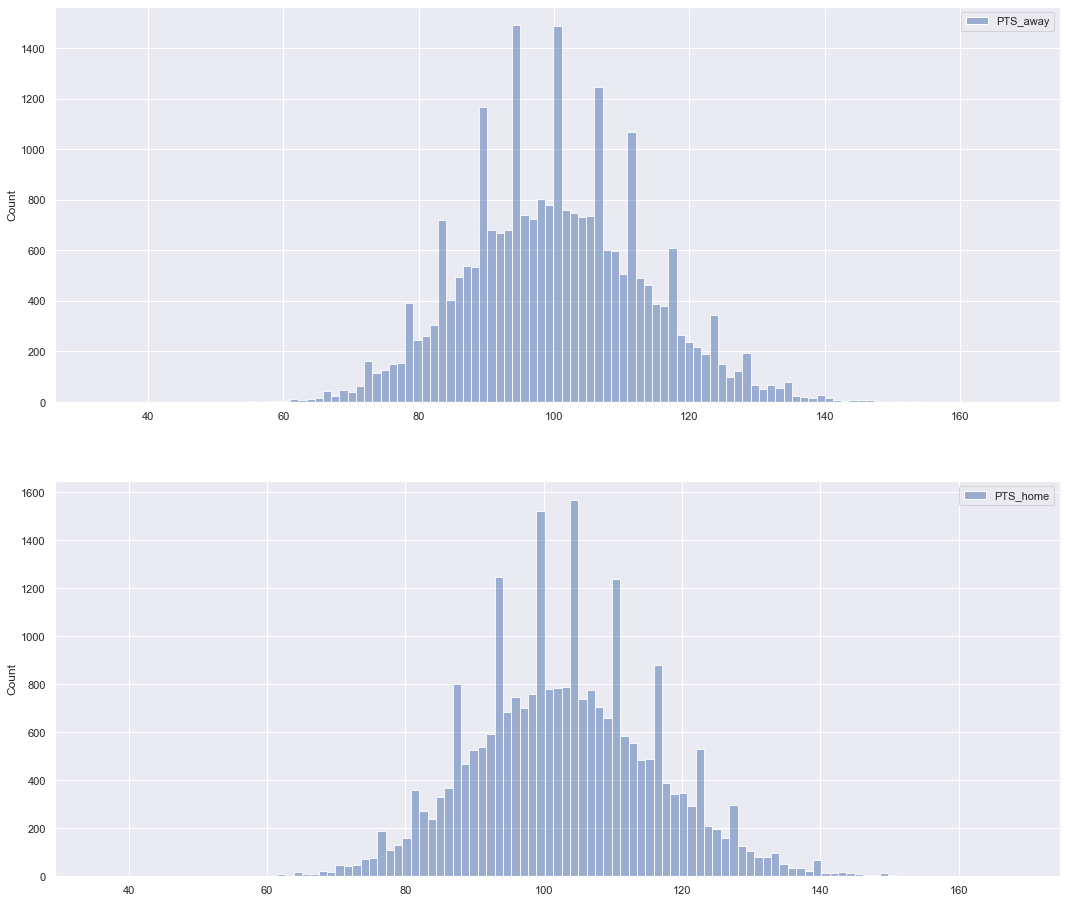

In [95]:
f, axes = plt.subplots(2, 1, figsize=(18, 16))
sb.histplot(data = p_away, ax = axes[0])
sb.histplot(data = p_home, ax = axes[1])

<AxesSubplot:>

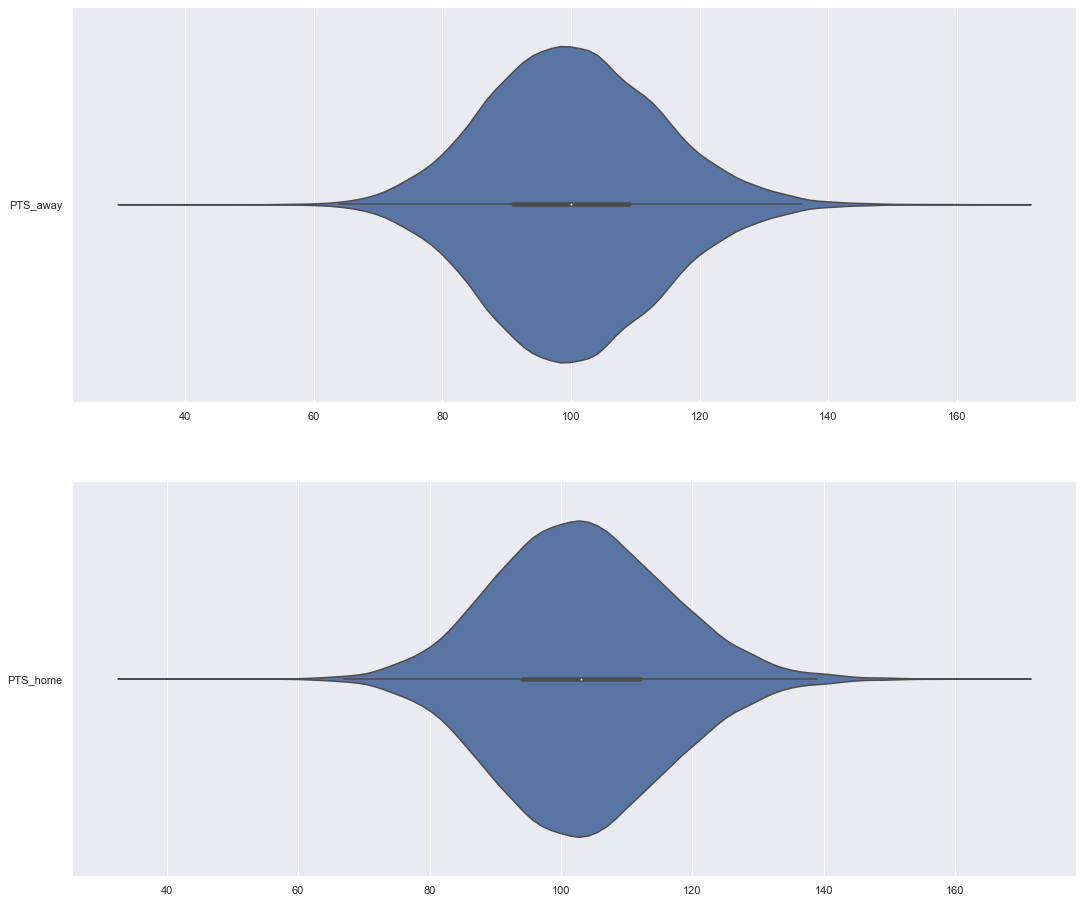

In [96]:
f, axes = plt.subplots(2, 1, figsize=(18, 16))
sb.violinplot(data = p_away, orient = "h", ax = axes[0])
sb.violinplot(data = p_home, orient = "h", ax = axes[1])

In [97]:
p_away.describe()

,PTS_away
count,25697.000000
mean,100.294120
std,13.343016
min,33.000000
25%,91.000000
50%,100.000000
75%,109.000000
max,168.000000


In [98]:
p_home.describe()

,PTS_home
count,25697.000000
mean,103.106044
std,13.174726
min,36.000000
25%,94.000000
50%,103.000000
75%,112.000000
max,168.000000


## PTS_home and PTS_away have somewhat similar distribution and statistics and hence it is difficult to judge whether the home team advantage is effective or not, if it exists.

## If there was a distinct difference between the two distributions, we would be able to tell where the bulk of the points scored are, and thus determine whether home court advantage exists and is effective from the difference between the two bulks of points scored by away and home teams.

          PTS_away  PTS_home
PTS_away  1.000000  0.483321
PTS_home  0.483321  1.000000


<AxesSubplot:>

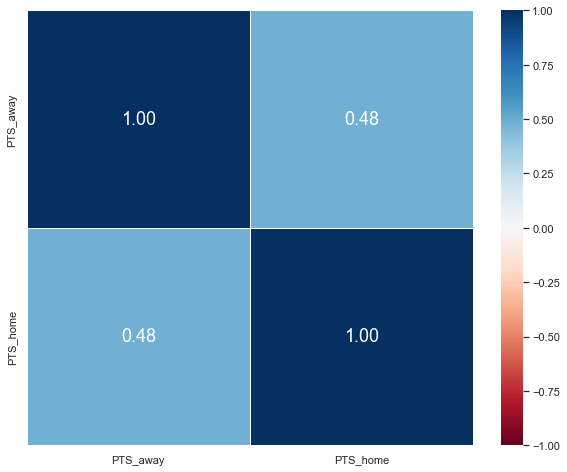

In [99]:
numeric_data = pd.DataFrame(game_data[["PTS_away", "PTS_home"]])
print(numeric_data.corr())
f = plt.figure(figsize=(10, 8))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

## The correlation between PTS_away PTS_home is quite low and hence this is not a good approach to know which type of team has the advantage here.

## We can on the other hand take a look at the number of wins scored by the home teams.

In [100]:
game_data.HOME_TEAM_WINS.describe()

count    25796.000000
mean         0.587494
std          0.492295
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

<AxesSubplot:>

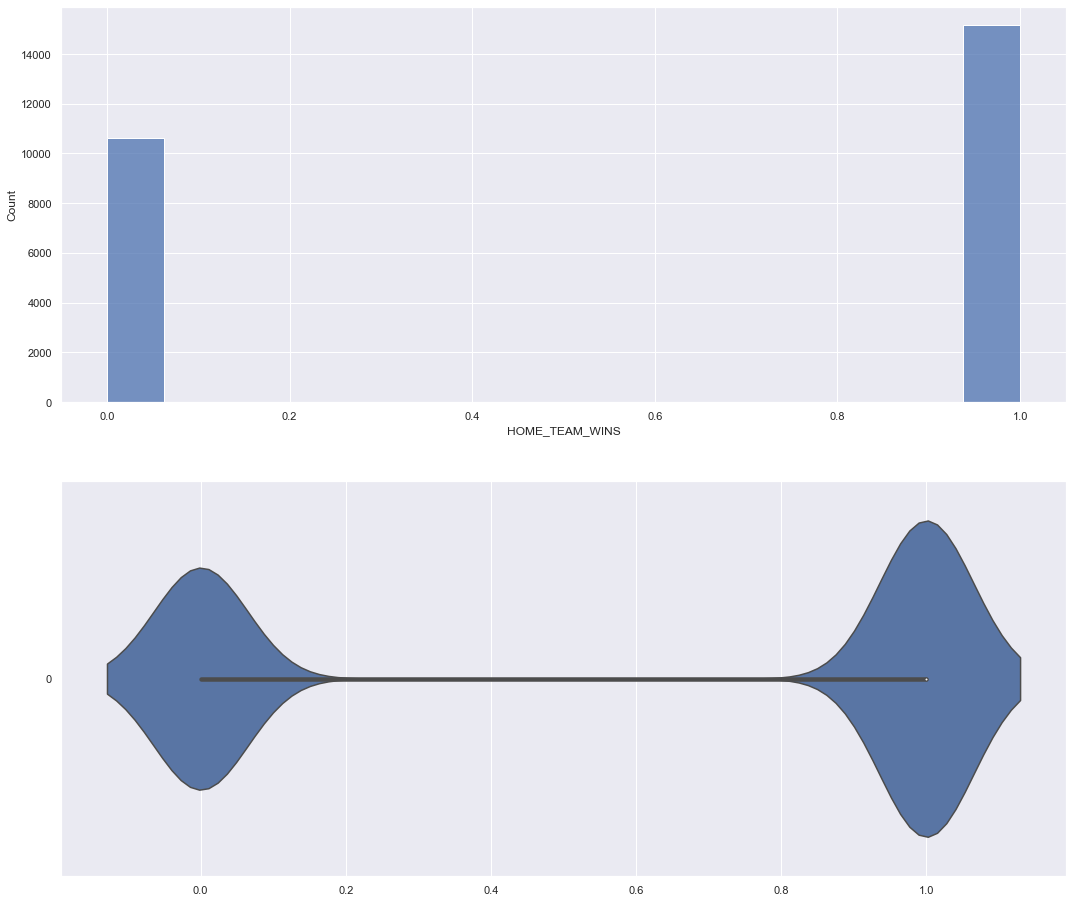

In [101]:
f, axes = plt.subplots(2, 1, figsize=(18, 16))
sb.histplot(data = game_data['HOME_TEAM_WINS'], ax = axes[0])
sb.violinplot(data = game_data['HOME_TEAM_WINS'], orient = "h", ax = axes[1])

## Based on the plots above, we can clearly tell that home teams definitely have an advantage during games since there is a clear distinction between the number of wins and losses by the home teams. But how effective is it?

In [102]:
p_home.isnull().sum()

PTS_home    99
dtype: int64

In [103]:
p_away.isnull().sum()

PTS_away    99
dtype: int64

In [104]:
game_data.isnull().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

## Now to start looking at the effectiveness of home court advantage based on the points margin
### --Cleaning and refining the dataset-- 

In [105]:
p_diff = pd.DataFrame(game_data['PTS_home'] - game_data['PTS_away'])

In [106]:
p_diff

,0
0,-9.0
1,10.0
2,-11.0
3,13.0
4,-12.0
...,...
25791,6.0
25792,-4.0
25793,3.0
25794,5.0


In [107]:
p_diff.isnull().sum()

0    99
dtype: int64

In [108]:
p_diff.fillna(0, inplace=True)

In [109]:
p_diff.isnull().sum()

0    0
dtype: int64

In [110]:
p_diff = p_diff.rename(columns={0 : 'win_loss'})

In [111]:
p_diff

,win_loss
0,-9.0
1,10.0
2,-11.0
3,13.0
4,-12.0
...,...
25791,6.0
25792,-4.0
25793,3.0
25794,5.0


## Win_loss here represents the points margin/difference from the perspective of the home teams.

In [112]:
game_clean = pd.concat([game_data, p_diff],axis=1)

In [113]:
game_clean.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,win_loss
0,12/3/2022,22101005,Final,Miami Heat,Minnesota Timberwolves,2021,Miami Heat,104.0,0.398,0.760,...,53.0,Minnesota Timberwolves,113.0,0.422,0.875,0.357,21.0,46.0,0,-9.0
1,12/3/2022,22101006,Final,Chicago Bulls,Cleveland Cavaliers,2021,Chicago Bulls,101.0,0.443,0.933,...,46.0,Cleveland Cavaliers,91.0,0.419,0.824,0.208,19.0,40.0,1,10.0
2,12/3/2022,22101007,Final,San Antonio Spurs,Indiana Pacers,2021,San Antonio Spurs,108.0,0.412,0.813,...,52.0,Indiana Pacers,119.0,0.489,1.000,0.389,23.0,47.0,0,-11.0
3,12/3/2022,22101008,Final,Golden State Warriors,Milwaukee Bucks,2021,Golden State Warriors,122.0,0.484,0.933,...,55.0,Milwaukee Bucks,109.0,0.413,0.696,0.386,27.0,39.0,1,13.0
4,12/3/2022,22101009,Final,Denver Nuggets,Toronto Raptors,2021,Denver Nuggets,115.0,0.551,0.750,...,39.0,Toronto Raptors,127.0,0.471,0.760,0.387,28.0,50.0,0,-12.0


In [114]:
game_clean.groupby('SEASON').win_loss.describe()

,count,mean,std,min,25%,50%,75%,max
SEASON,,,,,,,,
2003,1385.0,3.542238,11.620684,-32.0,-4.0,4.0,11.0,47.0
2004,1362.0,3.223201,12.340925,-35.0,-6.0,4.0,11.0,40.0
2005,1432.0,3.233939,12.338138,-33.0,-6.0,4.0,11.0,45.0
2006,1419.0,2.904863,12.730973,-50.0,-6.0,4.0,11.0,45.0
2007,1411.0,3.724309,13.640671,-42.0,-6.0,5.0,13.0,52.0
2008,1425.0,3.018947,13.289466,-58.0,-6.0,4.0,12.0,48.0
2009,1424.0,2.908708,13.226237,-50.0,-7.0,4.0,11.0,43.0
2010,1422.0,3.372011,12.790748,-51.0,-6.0,4.0,11.0,55.0
2011,1104.0,2.962862,13.297335,-39.0,-6.0,4.0,12.0,44.0


## If we look at the median, all the win_loss margins are positive, meaning to say at least 50% of the home teams managed to score an edge over the away teams across the different seasons.

In [115]:
game_clean['HOME_TEAM_WINS'] = pd.Categorical(game_clean.HOME_TEAM_WINS)
game_clean.dtypes

GAME_DATE_EST         object
GAME_ID                int64
GAME_STATUS_TEXT      object
HOME_TEAM_ID          object
VISITOR_TEAM_ID       object
SEASON                 int64
TEAM_ID_home          object
PTS_home             float64
FG_PCT_home          float64
FT_PCT_home          float64
FG3_PCT_home         float64
AST_home             float64
REB_home             float64
TEAM_ID_away          object
PTS_away             float64
FG_PCT_away          float64
FT_PCT_away          float64
FG3_PCT_away         float64
AST_away             float64
REB_away             float64
HOME_TEAM_WINS      category
win_loss             float64
dtype: object

In [116]:
game_clean['HOME_TEAM_WINS'] = game_clean['HOME_TEAM_WINS'].map({0:'Lose', 1:'Win'})

In [117]:
game_clean

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,win_loss
0,12/3/2022,22101005,Final,Miami Heat,Minnesota Timberwolves,2021,Miami Heat,104.0,0.398,0.760,...,53.0,Minnesota Timberwolves,113.0,0.422,0.875,0.357,21.0,46.0,Lose,-9.0
1,12/3/2022,22101006,Final,Chicago Bulls,Cleveland Cavaliers,2021,Chicago Bulls,101.0,0.443,0.933,...,46.0,Cleveland Cavaliers,91.0,0.419,0.824,0.208,19.0,40.0,Win,10.0
2,12/3/2022,22101007,Final,San Antonio Spurs,Indiana Pacers,2021,San Antonio Spurs,108.0,0.412,0.813,...,52.0,Indiana Pacers,119.0,0.489,1.000,0.389,23.0,47.0,Lose,-11.0
3,12/3/2022,22101008,Final,Golden State Warriors,Milwaukee Bucks,2021,Golden State Warriors,122.0,0.484,0.933,...,55.0,Milwaukee Bucks,109.0,0.413,0.696,0.386,27.0,39.0,Win,13.0
4,12/3/2022,22101009,Final,Denver Nuggets,Toronto Raptors,2021,Denver Nuggets,115.0,0.551,0.750,...,39.0,Toronto Raptors,127.0,0.471,0.760,0.387,28.0,50.0,Lose,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,6/10/2014,11400007,Final,Atlanta Hawks,New Orleans Pelicans,2014,Atlanta Hawks,93.0,0.419,0.821,...,50.0,New Orleans Pelicans,87.0,0.366,0.643,0.375,17.0,43.0,Win,6.0
25792,6/10/2014,11400004,Final,Chicago Bulls,Washington Wizards,2014,Chicago Bulls,81.0,0.338,0.719,...,40.0,Washington Wizards,85.0,0.411,0.636,0.267,17.0,47.0,Lose,-4.0
25793,6/10/2014,11400005,Final,Los Angeles Lakers,Denver Nuggets,2014,Los Angeles Lakers,98.0,0.448,0.682,...,45.0,Denver Nuggets,95.0,0.387,0.659,0.500,19.0,43.0,Win,3.0
25794,5/10/2014,11400002,Final,Toronto Raptors,Sacramento Kings,2014,Toronto Raptors,99.0,0.440,0.771,...,30.0,Sacramento Kings,94.0,0.469,0.725,0.385,18.0,45.0,Win,5.0


<AxesSubplot:>

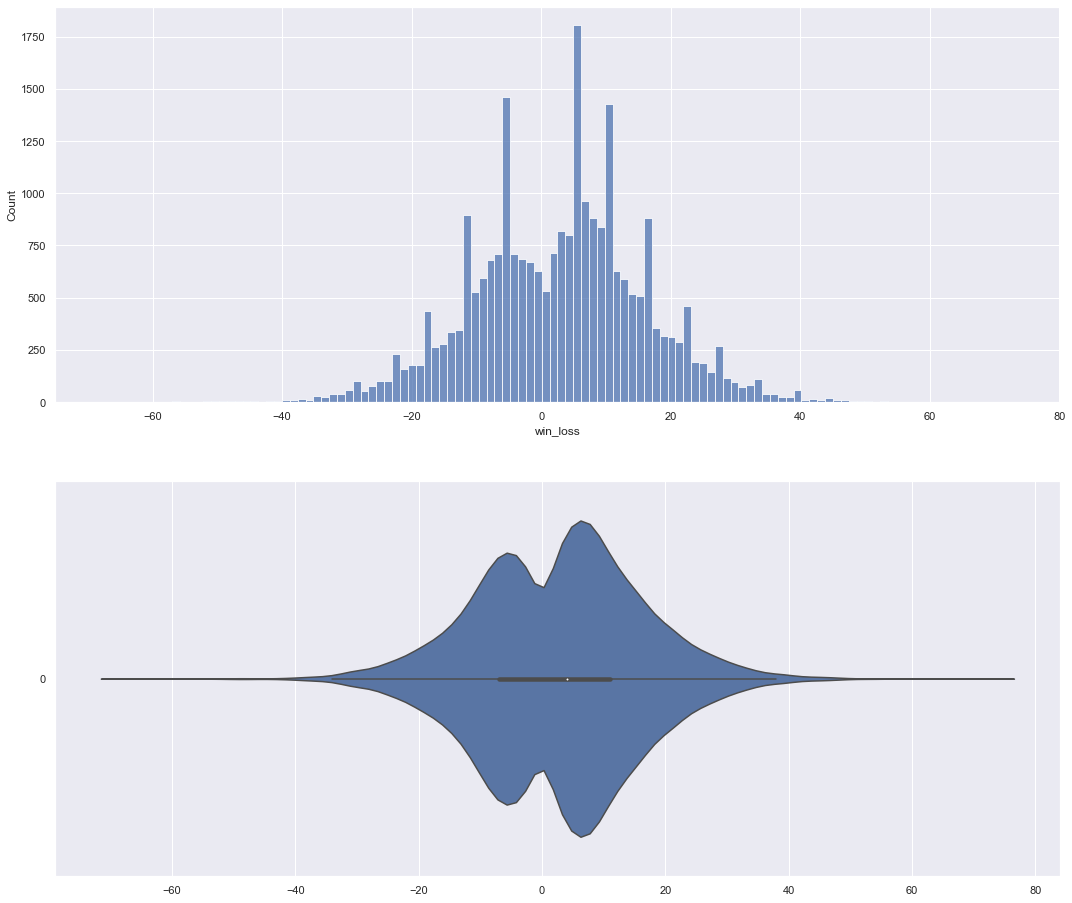

In [118]:
f, axes = plt.subplots(2, 1, figsize=(18, 16))
sb.histplot(data = game_clean['win_loss'], ax = axes[0])
sb.violinplot(data = game_clean['win_loss'], orient = "h", ax = axes[1])

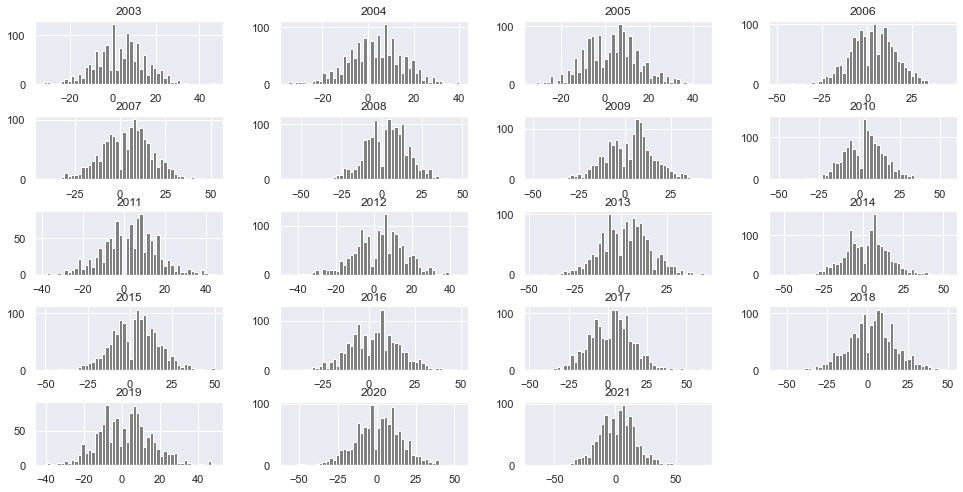

In [119]:
ax = (
    game_clean
    .hist(
        by='SEASON',
        column = 'win_loss',
        bins=50,
        figsize=(16, 10),
        layout=(6, 4), 
        color='grey',
        rot=0
    )
)

## Based on the histogram plots across seasons 2003 to 2021, most of them have peaks appearing on the positive (right) side of the win_loss difference axis, meaning to say majority of the games have home teams winning rather than losing, albeit even by a small margin.

In [120]:
game_clean.groupby('HOME_TEAM_ID').HOME_TEAM_WINS.describe()

,count,unique,top,freq
HOME_TEAM_ID,,,,
Atlanta Hawks,855,2,Win,484
Boston Celtics,914,2,Win,581
Brooklyn Nets,848,2,Win,429
Charlotte Hornets,772,2,Lose,390
Chicago Bulls,874,2,Win,506
Cleveland Cavaliers,890,2,Win,532
Dallas Mavericks,875,2,Win,570
Denver Nuggets,848,2,Win,574
Detroit Pistons,877,2,Win,506


## As seen above, 26 out of 30 of home teams have higher frequency of wins as compared to losses, which means the probability of having a home team win is approximately 86.7%.

In [121]:
game_clean.groupby('HOME_TEAM_ID').win_loss.describe()

,count,mean,std,min,25%,50%,75%,max
HOME_TEAM_ID,,,,,,,,
Atlanta Hawks,855.0,1.467836,12.928051,-41.0,-8.00,3.0,10.00,46.0
Boston Celtics,914.0,4.386214,12.749274,-44.0,-5.00,5.0,12.00,53.0
Brooklyn Nets,848.0,-0.306604,13.405328,-39.0,-9.25,1.0,9.00,44.0
Charlotte Hornets,772.0,-0.031088,13.017959,-68.0,-8.00,-1.0,9.00,61.0
Chicago Bulls,874.0,2.061785,13.751046,-56.0,-7.00,3.0,10.00,47.0
Cleveland Cavaliers,890.0,2.492135,14.123131,-41.0,-7.00,4.0,11.00,45.0
Dallas Mavericks,875.0,4.654857,13.039623,-34.0,-4.00,5.0,12.00,53.0
Denver Nuggets,848.0,5.558962,13.022143,-38.0,-4.00,6.0,14.00,52.0
Detroit Pistons,877.0,2.579247,12.913912,-44.0,-7.00,4.0,11.00,45.0


## Based on the description above, 19 out of 30 teams have a larger margin of win points as compared to loss points when we compare the maximum and minimum points margin they have obtained while competing against the away teams. When we compare the 1st and 3rd quartile, 28 out of 30 teams have a larger margin of win points as compared to loss points.

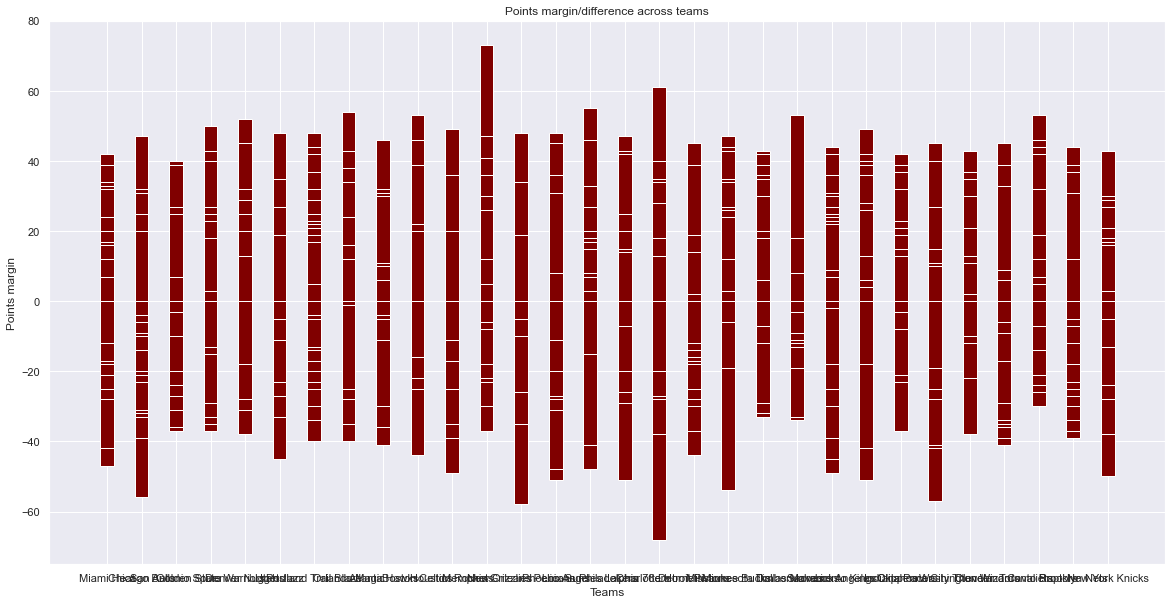

In [131]:
fig = plt.figure(figsize = (20, 10))
courses = list(game_clean['HOME_TEAM_ID'])
values = list(game_clean['win_loss'])
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
plt.xlabel("Teams")
plt.ylabel("Points margin")
plt.title("Points margin/difference across teams")
plt.show()

## Looking at the bar plot, if we were to compare the points margin in general across the teams, I would say approximately 16-17 teams out of 30 have a larger positive points margin (win) than negative points margin (loss).

## This shows that home court advantage may indeed be effective.

In [128]:
game_clean.groupby('HOME_TEAM_ID').win_loss.mean()

HOME_TEAM_ID
Atlanta Hawks             1.467836
Boston Celtics            4.386214
Brooklyn Nets            -0.306604
Charlotte Hornets        -0.031088
Chicago Bulls             2.061785
Cleveland Cavaliers       2.492135
Dallas Mavericks          4.654857
Denver Nuggets            5.558962
Detroit Pistons           2.579247
Golden State Warriors     5.819747
Houston Rockets           4.577803
Indiana Pacers            4.058824
Los Angeles Clippers      2.979405
Los Angeles Lakers        2.810582
Memphis Grizzlies         2.314554
Miami Heat                4.584599
Milwaukee Bucks           2.427230
Minnesota Timberwolves   -0.086797
New Orleans Pelicans      1.222899
New York Knicks          -0.514778
Oklahoma City Thunder     3.407834
Orlando Magic             1.146399
Philadelphia 76ers        1.209716
Phoenix Suns              2.951106
Portland Trail Blaze      2.924794
Sacramento Kings         -0.019560
San Antonio Spurs         7.732240
Toronto Raptors           3.501163
Utah Ja

## The above is a closer look at the average win_loss points (margin) for each respective home teams. These values are used to represent the rate of home court effectiveness for each team, the higher the value the larger the effectiveness and likewise for lower values.